# Import libraries

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import colors
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score,silhouette_samples, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings('ignore')

# Reading and exploring data

In [ ]:
#Read the dataset
df = pd.read_csv('/content/drive/MyDrive/GP-Ai/Family Income and Expenditure.csv')
df.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,Alcoholic Beverages Expenditure,Tobacco Expenditure,"Clothing, Footwear and Other Wear Expenditure",Housing and water Expenditure,Imputed House Rental Value,Medical Care Expenditure,Transportation Expenditure,Communication Expenditure,Education Expenditure,Miscellaneous Goods and Services Expenditure,Special Occasions Expenditure,Crop Farming and Gardening expenses,Total Income from Entrepreneurial Acitivites,Household Head Sex,Household Head Age,Household Head Marital Status,Household Head Highest Grade Completed,Household Head Job or Business Indicator,Household Head Occupation,Household Head Class of Worker,Type of Household,Total Number of Family members,Members with age less than 5 year old,Members with age 5 - 17 years old,Total number of family members employed,Type of Building/House,Type of Roof,Type of Walls,House Floor Area,House Age,Number of bedrooms,Tenure Status,Toilet Facilities,Electricity,Main Source of Water Supply,Number of Television,Number of CD/VCD/DVD,Number of Component/Stereo set,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,13460,3000,0,0,4607,63636,30000,3457,4776,2880,36200,34056,7200,19370,44370,Female,49,Single,Teacher Training and Education Sciences Programs,With Job/Business,General elementary education teaching professi...,Worked for government/government corporation,Extended Family,4,0,1,1,Single house,"Strong material(galvanized,iron,al,tile,concre...",Strong,80,75,3,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusiv...",1,"Own use, faucet, community water system",1,1,0,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,7833,2360,960,2132,8230,41370,27000,3520,12900,5700,29300,9150,1500,0,0,Male,40,Married,Transport Services Programs,With Job/Business,Transport conductors,Worked for private establishment,Single Family,3,0,1,2,Single house,"Strong material(galvanized,iron,al,tile,concre...",Strong,42,15,2,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusiv...",1,"Own use, faucet, community water system",1,1,1,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,3795,4545,270,4525,2735,14340,7200,70,324,420,425,6450,500,0,0,Male,39,Married,Grade 3,With Job/Business,Farmhands and laborers,Worked for private establishment,Single Family,6,0,4,3,Single house,"Light material (cogon,nipa,anahaw)",Light,35,12,1,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, shared with o...",0,"Shared, faucet, community water system",0,0,0,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,7887,6280,480,0,1390,16638,6600,60,6840,660,300,3762,500,15580,15580,Male,52,Married,Elementary Graduate,With Job/Business,Rice farmers,Employer in own family-operated farm or business,Single Family,3,0,3,2,Single house,"Light material (cogon,nipa,anahaw)",Light,30,15,1,Own or owner-like possession of house and lot,Closed pit,1,"Own use, faucet, community water system",1,0,0,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,11260,6400,1040,0,4620,31122,16800,140,6996,2100,0,8472,1000,18887,75687,Male,65,Married,Elementary Graduate,With Job/Business,General managers/managing proprietors in trans...,Self-employed wihout any employee,Single Family,4,0,0,2,Single house,"Light material (cogon,nipa,an

In [ ]:
df.tail()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,Alcoholic Beverages Expenditure,Tobacco Expenditure,"Clothing, Footwear and Other Wear Expenditure",Housing and water Expenditure,Imputed House Rental Value,Medical Care Expenditure,Transportation Expenditure,Communication Expenditure,Education Expenditure,Miscellaneous Goods and Services Expenditure,Special Occasions Expenditure,Crop Farming and Gardening expenses,Total Income from Entrepreneurial Acitivites,Household Head Sex,Household Head Age,Household Head Marital Status,Household Head Highest Grade Completed,Household Head Job or Business Indicator,Household Head Occupation,Household Head Class of Worker,Type of Household,Total Number of Family members,Members with age less than 5 year old,Members with age 5 - 17 years old,Total number of family members employed,Type of Building/House,Type of Roof,Type of Walls,House Floor Area,House Age,Number of bedrooms,Tenure Status,Toilet Facilities,Electricity,Main Source of Water Supply,Number of Television,Number of CD/VCD/DVD,Number of Component/Stereo set,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
41539,119773,XII - SOCCSKSARGEN,44875,Enterpreneurial Activities,1,23675,21542,1476,6120,1632,3882,1805,0,133,1395,18372,12000,294,2124,600,50,3978,2500,94120,94120,Male,42,Married,Elementary Graduate,With Job/Business,Rice farmers,Self-employed wihout any employee,Extended Family,6,2,0,0,Single house,Mixed but predominantly strong materials,Strong,30,14,1,Own or owner-like possession of house and lot,Open pit,1,"Own use, tubed/piped deep well",1,0,0,0,0,0,0,0,1,0,0,0,0
41540,137320,XII - SOCCSKSARGEN,31157,Enterpreneurial Activities,1,2691,1273,1886,4386,1840,3110,9090,0,300,3136,17640,10800,890,2568,1560,1550,6090,1500,78270,78270,Male,49,Married,Elementary Graduate,With Job/Business,Rice farmers,Self-employed wihout any employee,Single Family,6,0,3,0,Single house,"Strong material(galvanized,iron,al,tile,concre...",Strong,40,6,2,Own or owner-like possession of house and lot,Open pit,1,"Own use, tubed/piped deep well",1,1,0,0,0,0,0,0,3,0,0,0,0
41541,133171,XII - SOCCSKSARGEN,45882,Enterpreneurial Activities,2,28646,27339,480,4796,1232,3025,3330,0,0,2460,9240,4800,540,2040,1080,0,3570,500,54965,98545,Male,56,Married,Grade 1,With Job/Business,Rice farmers,Self-employed wihout any employee,Single Family,4,0,0,1,Single house,"Light material (cogon,nipa,anahaw)",Strong,35,20,1,"Own house, rent-free lot with consent of owner",Open pit,1,"Own use, tubed/piped deep well",0,0,0,0,0,0,0,0,1,0,0,0,0
41542,129500,XII - SOCCSKSARGEN,81416,Enterpreneurial Activities,1,29996,26655,2359,17730,2923,7951,13660,0,630,3755,12438,7200,314,2412,1020,5295,5760,1000,95785,107435,Male,34,Widowed,First Year High School,With Job/Business,Rice farmers,Self-employed wihout any employee,Extended Family,9,0,3,0,Single house,"Strong material(galvanized,iron,al,tile,concre...",Strong,25,11,1,"Own house, rent-free lot without consent of owner",Open pit,1,Dug well,0,0,0,0,0,0,0,0,2,0,0,0,0
41543,128598,XII - SOCCSKSARGEN,78195,Enterpreneurial Activities,1,43485,41205,1985,7735,2062,7114,5750,0,120,2320,11316,6000,330,1560,960,80,6060,2500,84247,105547,Male,86,Married,No Grade Completed,No Job/Business,NaN,NaN,Single Family,8,1,1,0,Single house,Mixed but predominantly strong materials,Strong,28,10,1,"Own house, rent-free lot without consent of owner",Open pit,1,Dug well,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
df.shape

(41544, 60)

In [ ]:
# Creat a new datafram with important columns only
data =df[['Total Household Income','Total Food Expenditure',
 'Bread and Cereals Expenditure',
 'Total Rice Expenditure',
 'Meat Expenditure',
 'Total Fish and  marine products Expenditure',
 'Fruit Expenditure',
 'Vegetables Expenditure',
 'Restaurant and hotels Expenditure',
 'Alcoholic Beverages Expenditure',
 'Tobacco Expenditure',
 'Clothing, Footwear and Other Wear Expenditure',
 'Housing and water Expenditure',
 'Medical Care Expenditure',
 'Transportation Expenditure',
 'Communication Expenditure',
 'Education Expenditure',
 'Miscellaneous Goods and Services Expenditure',
 'Special Occasions Expenditure',
 'Imputed House Rental Value',
 'Total Income from Entrepreneurial Acitivites',
 'Tenure Status',
 'Crop Farming and Gardening expenses',
 'Household Head Sex','Household Head Age','Household Head Marital Status',
 'Total Number of Family members','Members with age less than 5 year old',
 'Members with age 5 - 17 years old']]

In [ ]:
data.shape

(41544, 29)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Total Household Income                         41544 non-null  int64 
 1   Total Food Expenditure                         41544 non-null  int64 
 2   Bread and Cereals Expenditure                  41544 non-null  int64 
 3   Total Rice Expenditure                         41544 non-null  int64 
 4   Meat Expenditure                               41544 non-null  int64 
 5   Total Fish and  marine products Expenditure    41544 non-null  int64 
 6   Fruit Expenditure                              41544 non-null  int64 
 7   Vegetables Expenditure                         41544 non-null  int64 
 8   Restaurant and hotels Expenditure              41544 non-null  int64 
 9   Alcoholic Beverages Expenditure                41544 non-null

In [ ]:
# Statistical analysis of numrial columns
data.describe()

,Total Household Income,Total Food Expenditure,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,Alcoholic Beverages Expenditure,Tobacco Expenditure,"Clothing, Footwear and Other Wear Expenditure",Housing and water Expenditure,Medical Care Expenditure,Transportation Expenditure,Communication Expenditure,Education Expenditure,Miscellaneous Goods and Services Expenditure,Special Occasions Expenditure,Imputed House Rental Value,Total Income from Entrepreneurial Acitivites,Crop Farming and Gardening expenses,Household Head Age,Total Number of Family members,Members with age less than 5 year old,Members with age 5 - 17 years old
count,4.154400e+04,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,4.154400e+04,4.154400e+04,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,4.154400e+04,4.154400e+04,4.154400e+04,41544.000000,41544.000000,41544.000000,41544.000000
mean,2.475556e+05,85099.158194,25133.723642,18195.825005,10540.072574,10529.318337,2550.474990,5006.918568,15436.566075,1085.068121,2294.736183,4954.621076,3.837547e+04,7.160231e+03,11806.344454,4095.492057,7473.500481,12522.071635,5265.726001,2.092154e+04,5.437624e+04,1.381686e+04,51.381451,4.635182,0.410216,1.362579
std,2.868805e+05,51637.947682,13466.482984,11727.224350,10497.727757,7812.201613,2969.752879,3300.175236,23705.195929,2174.431913,3998.977131,7496.500945,5.311168e+04,2.690200e+04,19351.213715,7298.822614,21219.170907,17547.027921,13279.593681,3.937152e+04,1.471428e+05,4.764378e+04,14.166081,2.280252,0.694390,1.408000
min,1.128500e+04,2947.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.950000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,9.000000,1.000000,0.000000,0.000000
25%,1.048950e+05,51017.250000,16556.000000,11020.000000,3353.750000,5504.000000,1024.750000,2873.000000,1930.000000,0.000000,0.000000,1365.000000,1.308000e+04,3.000000e+02,2412.000000,564.000000,0.000000,3792.000000,0.000000,6.000000e+03,0.000000e+00,0.000000e+00,41.000000,3.000000,0.000000,0.000000
50%,1.640795e+05,72985.500000,23324.000000,16620.000000,7332.500000,8695.000000,1820.000000,4314.000000,7314.000000,270.000000,300.000000,2740.000000,2.299200e+04,1.125000e+03,6036.000000,1506.000000,880.000000,6804.000000,1500.000000,1.080000e+04,1.922200e+04,0.000000e+00,51.000000,4.000000,0.000000,1.000000
75%,2.911385e+05,105635.500000,31439.000000,23920.000000,14292.000000,13388.000000,3100.000000,6304.250000,19921.250000,1299.250000,3146.500000,5580.000000,4.594800e+04,4.680000e+03,13776.000000,3900.000000,4060.000000,14154.000000,5000.000000,2.400000e+04,6.596875e+04,6.312750e+03,61.000000,6.000000,1.000000,2.000000
max,1.181599e+07,827565.000000,765864.000000,758326.000000,261566.000000,188208.000000,273769.000000,74800.000000,725296.000000,59592.000000,139370.000000,356750.000000,2.188560e+06,1.049275e+06,834996.000000,149940.000000,731000.000000,553560.000000,556700.000000,1.920000e+06,9.234485e+06,3.729973e+06,99.000000,26.000000,5.000000,8.000000


In [ ]:
# Statistical analysis of categorical columns
data.describe(include='object')

,Tenure Status,Household Head Sex,Household Head Marital Status
count,41544,41544,41544
unique,8,2,6
top,Own or owner-like possession of house and lot,Male,Married
freq,29541,32483,31347


In [ ]:
# Check number of null values in each column
data.isnull().sum()

Total Household Income                           0
Total Food Expenditure                           0
Bread and Cereals Expenditure                    0
Total Rice Expenditure                           0
Meat Expenditure                                 0
Total Fish and  marine products Expenditure      0
Fruit Expenditure                                0
Vegetables Expenditure                           0
Restaurant and hotels Expenditure                0
Alcoholic Beverages Expenditure                  0
Tobacco Expenditure                              0
Clothing, Footwear and Other Wear Expenditure    0
Housing and water Expenditure                    0
Medical Care Expenditure                         0
Transportation Expenditure                       0
Communication Expenditure                        0
Education Expenditure                            0
Miscellaneous Goods and Services Expenditure     0
Special Occasions Expenditure                    0
Imputed House Rental Value     

In [ ]:
# determine number of unique values in each column
data.nunique()

Total Household Income                           38670
Total Food Expenditure                           35776
Bread and Cereals Expenditure                    26082
Total Rice Expenditure                           16145
Meat Expenditure                                 18619
Total Fish and  marine products Expenditure      18014
Fruit Expenditure                                 7140
Vegetables Expenditure                           10599
Restaurant and hotels Expenditure                12367
Alcoholic Beverages Expenditure                   4084
Tobacco Expenditure                               3118
Clothing, Footwear and Other Wear Expenditure     9819
Housing and water Expenditure                    13243
Medical Care Expenditure                         11887
Transportation Expenditure                        7435
Communication Expenditure                         3826
Education Expenditure                             6893
Miscellaneous Goods and Services Expenditure      7669
Special Oc

In [ ]:
# Check if the dataset contains any duplicates
data.duplicated().sum()

0

Check the values in those columns to know if we will can use them

In [ ]:
df['Type of Household'].unique()

array(['Extended Family', 'Single Family',
       'Two or More Nonrelated Persons/Members'], dtype=object)

In [ ]:
df['Type of Building/House'].unique()

array(['Single house', 'Duplex',
       'Commercial/industrial/agricultural building',
       'Multi-unit residential', 'Institutional living quarter',
       'Other building unit (e.g. cave, boat)'], dtype=object)

In [ ]:
data['Household Head Marital Status'].unique()

array(['Single', 'Married', 'Widowed', 'Divorced/Separated', 'Annulled',
       'Unknown'], dtype=object)

In [ ]:
data['Tenure Status'].unique()

array(['Own or owner-like possession of house and lot',
       'Rent-free house and lot with consent of owner',
       'Own house, rent-free lot with consent of owner',
       'Own house, rent-free lot without consent of owner',
       'Own house, rent lot', 'Rent house/room including lot',
       'Not Applicable',
       'Rent-free house and lot without consent of owner'], dtype=object)

# Feature Engineering

In [ ]:
# Combining age<5 years and age 5-17 years to make column 'number of kids'

data['Number of Kids'] = data['Members with age less than 5 year old'] + data['Members with age 5 - 17 years old']
data.drop(columns = ['Members with age less than 5 year old','Members with age 5 - 17 years old'], inplace = True)
data.columns

Index(['Total Household Income', 'Total Food Expenditure',
       'Bread and Cereals Expenditure', 'Total Rice Expenditure',
       'Meat Expenditure', 'Total Fish and  marine products Expenditure',
       'Fruit Expenditure', 'Vegetables Expenditure',
       'Restaurant and hotels Expenditure', 'Alcoholic Beverages Expenditure',
       'Tobacco Expenditure', 'Clothing, Footwear and Other Wear Expenditure',
       'Housing and water Expenditure', 'Medical Care Expenditure',
       'Transportation Expenditure', 'Communication Expenditure',
       'Education Expenditure', 'Miscellaneous Goods and Services Expenditure',
       'Special Occasions Expenditure', 'Imputed House Rental Value',
       'Total Income from Entrepreneurial Acitivites', 'Tenure Status',
       'Crop Farming and Gardening expenses', 'Household Head Sex',
       'Household Head Age', 'Household Head Marital Status',
       'Total Number of Family members', 'Number of Kids'],
      dtype='object')

In [ ]:
# map the Tenure Status to Rented Or owned
house_category= {
    'Rent house/room including lot': 'Rented',
    'Rent-free house and lot with consent of owner': 'Rented',
    'Rent-free house and lot without consent of owner': 'Rented',
    'Own or owner-like possession of house and lot': 'Owned',
    'Own house, rent-free lot with consent of owner': 'Owned',
    'Own house, rent-free lot without consent of owner': 'Owned',
    'Own house, rent lot': 'Owned',
    'Not Applicable': 'Other'
}

# Apply the mapping to create a new column
data['House Category'] = data['Tenure Status'].replace(house_category)
data.drop(columns =['Tenure Status'],inplace = True)
data['House Category'].value_counts()

House Category
Owned     37126
Rented     4345
Other        73
Name: count, dtype: int64

In [ ]:
# map the values of 'Divorced/Separated', 'Annulled to divorced
marital_status={
    'Divorced/Separated':'Divorced',
    'Annulled':'Divorced'}
data['Marital Status'] = data['Household Head Marital Status'].replace(marital_status)
data.drop(columns =['Household Head Marital Status'], inplace = True)
data['Marital Status'].value_counts()

Marital Status
Married     31347
Widowed      6818
Single       1942
Divorced     1436
Unknown         1
Name: count, dtype: int64

In [ ]:
# combining 'Tobacco Expenditure','Alcoholic Beverages Expenditure' with 'Special Occasions Expenditure' column
data["Special Occasions Expenditure"]=data["Tobacco Expenditure"]+data["Alcoholic Beverages Expenditure"]+data["Special Occasions Expenditure"]
data.drop(columns = ['Tobacco Expenditure','Alcoholic Beverages Expenditure'], inplace = True)
data["Special Occasions Expenditure"].head()

0    7200
1    4592
2    5295
3     980
4    2040
Name: Special Occasions Expenditure, dtype: int64

In [ ]:
#Creating a new column 'Money Saved'
data['Money Saved'] = data['Total Household Income'] - data.loc[:, ['Total Food Expenditure',
         'Restaurant and hotels Expenditure', 'Clothing, Footwear and Other Wear Expenditure',
         'Housing and water Expenditure', 'Communication Expenditure',
         'Medical Care Expenditure', 'Transportation Expenditure', 'Education Expenditure',
         'Miscellaneous Goods and Services Expenditure','Special Occasions Expenditure',
         'Crop Farming and Gardening expenses']].sum(axis = 1)
data.head()

,Total Household Income,Total Food Expenditure,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,"Clothing, Footwear and Other Wear Expenditure",Housing and water Expenditure,Medical Care Expenditure,Transportation Expenditure,Communication Expenditure,Education Expenditure,Miscellaneous Goods and Services Expenditure,Special Occasions Expenditure,Imputed House Rental Value,Total Income from Entrepreneurial Acitivites,Crop Farming and Gardening expenses,Household Head Sex,Household Head Age,Total Number of Family members,Number of Kids,House Category,Marital Status,Money Saved
0,480332,117848,42140,38300,24676,16806,3325,13460,3000,4607,63636,3457,4776,2880,36200,34056,7200,30000,44370,19370,Female,49,4,1,Owned,Single,183302
1,198235,67766,17329,13008,17434,11073,2035,7833,2360,8230,41370,3520,12900,5700,29300,9150,4592,27000,0,0,Male,40,3,1,Owned,Married,13347
2,82785,61609,34182,32001,7783,2590,1730,3795,4545,2735,14340,70,324,420,425,6450,5295,7200,0,0,Male,39,6,4,Owned,Married,-13428
3,107589,78189,34030,28659,10914,10812,690,7887,6280,1390,16638,60,6840,660,300,3762,980,6600,15580,15580,Male,52,3,3,Owned,Married,-23090
4,189322,94625,34820,30167,18391,11309,1395,11260,6400,4620,31122,140,6996,2100,0,8472,2040,16800,75687,18887,Male,65,4,0,Owned,Married,13920


In [ ]:
# drop not needed column
data.drop(['Household Head Sex','Household Head Age',
         'Total Food Expenditure','Bread and Cereals Expenditure',
         'Total Rice Expenditure','Meat Expenditure','Fruit Expenditure',
         'Total Fish and  marine products Expenditure',
         'Vegetables Expenditure','Restaurant and hotels Expenditure',
         'Clothing, Footwear and Other Wear Expenditure','Housing and water Expenditure',
         'Medical Care Expenditure','Transportation Expenditure',
         'Communication Expenditure','Education Expenditure',
         'Miscellaneous Goods and Services Expenditure','Special Occasions Expenditure',
         'Imputed House Rental Value','Total Income from Entrepreneurial Acitivites',
         'Crop Farming and Gardening expenses'],axis=1,inplace=True)

In [ ]:
data.shape

(41544, 6)

In [ ]:
data.head()

,Total Household Income,Total Number of Family members,Number of Kids,House Category,Marital Status,Money Saved
0,480332,4,1,Owned,Single,183302
1,198235,3,1,Owned,Married,13347
2,82785,6,4,Owned,Married,-13428
3,107589,3,3,Owned,Married,-23090
4,189322,4,0,Owned,Married,13920


# Handling Outliers

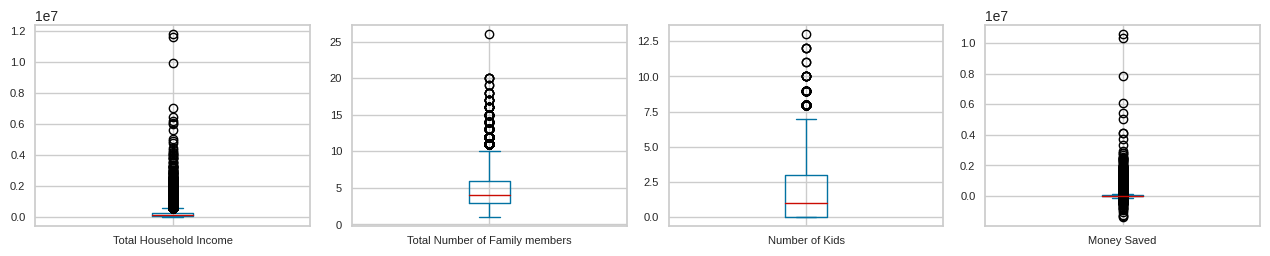

In [ ]:
# exclude categorical data and creat a new datafarme to handel the outliers
data_numric=data.select_dtypes(exclude='object')
#boxploting each feature
fig, axes = plt.subplots(figsize=(16, 12))
data_numric.plot(kind='box', subplots=True, layout=(5, 5), ax=axes, fontsize=8)
fig.tight_layout(pad=1.0)
plt.show()

<Axes: xlabel='Money Saved'>

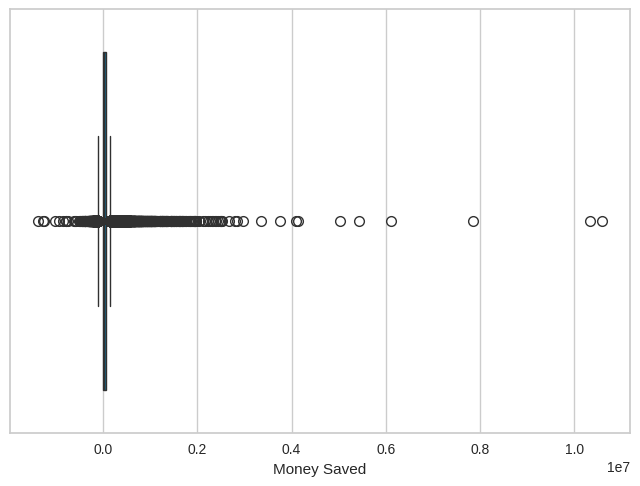

In [ ]:
# Boxploting "Total Household Income" feature
sns.boxplot(x=data_numric["Money Saved"])

<Axes: xlabel='Money Saved'>

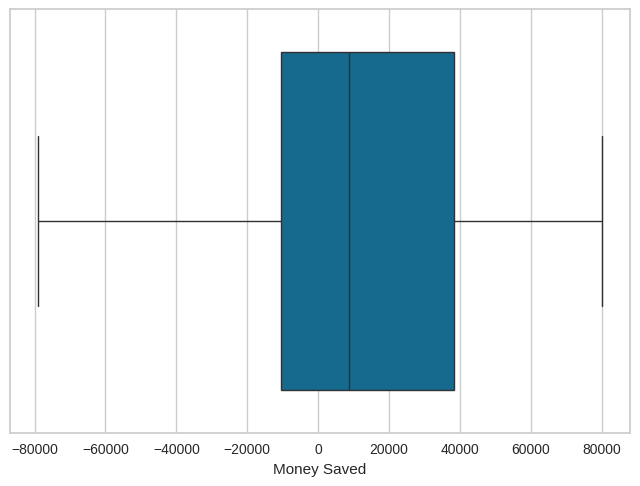

In [ ]:
# Handling the outliers by replacing them with the mean of the feature
data.loc[data["Money Saved"] >= 80000, "Money Saved"] = data["Money Saved"].mean()
data.loc[data["Money Saved"] <= -79000, "Money Saved"] = data["Money Saved"].mean()

sns.boxplot(x=data["Money Saved"])

<Axes: xlabel='Total Household Income'>

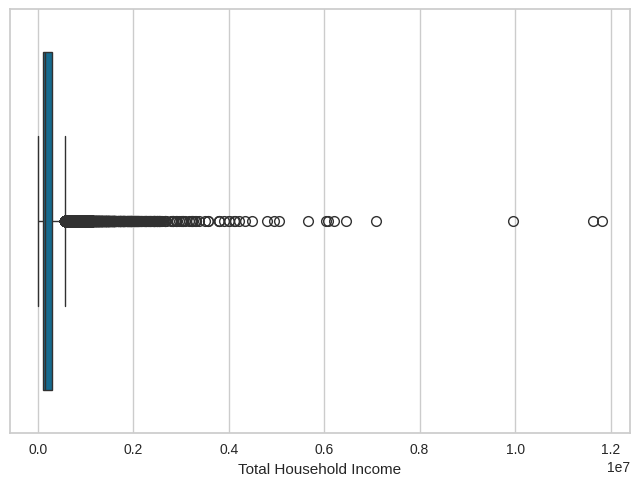

In [ ]:
# Boxploting "Total Household Income" feature
sns.boxplot(x=data_numric["Total Household Income"])

<Axes: xlabel='Total Household Income'>

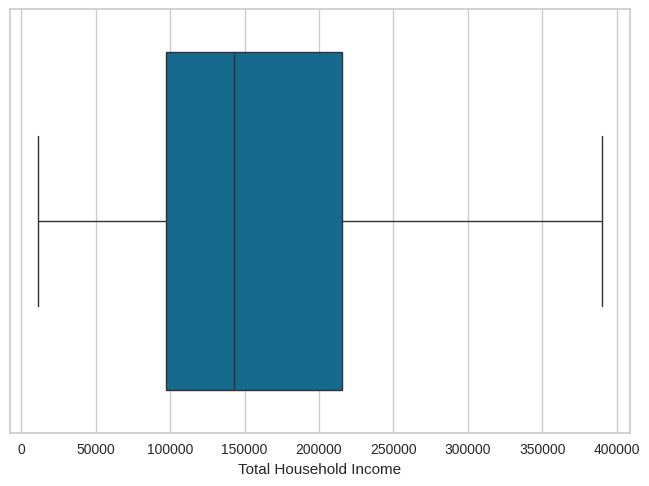

In [ ]:
# Handling the outliers by removing them
data=data[data["Total Household Income"]<390000]
sns.boxplot(x=data["Total Household Income"])

<Axes: xlabel='Total Number of Family members'>

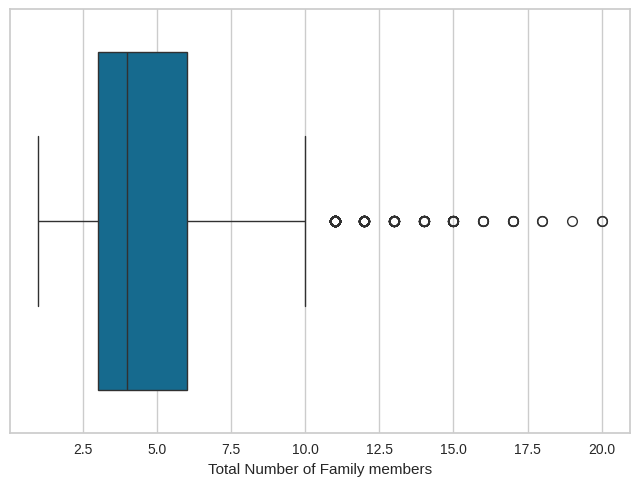

In [ ]:
# Boxploting "Total Number of Family members" feature
sns.boxplot(x=data["Total Number of Family members"])

<Axes: xlabel='Total Number of Family members'>

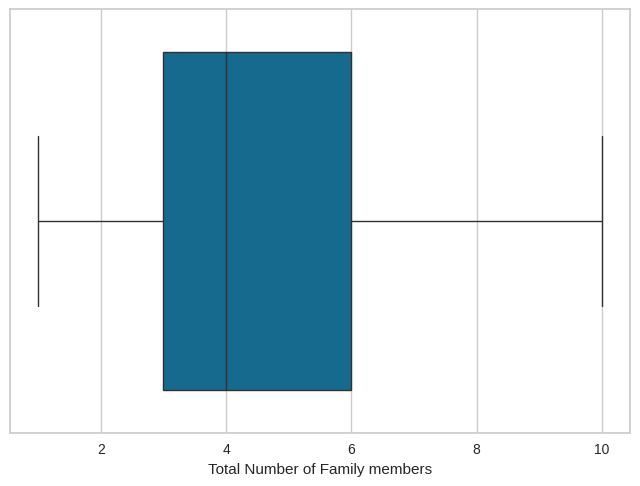

In [ ]:
# Handling the outliers by removing them
data=data[data["Total Number of Family members"]<=10]
sns.boxplot(x=data["Total Number of Family members"])

<Axes: xlabel='Number of Kids'>

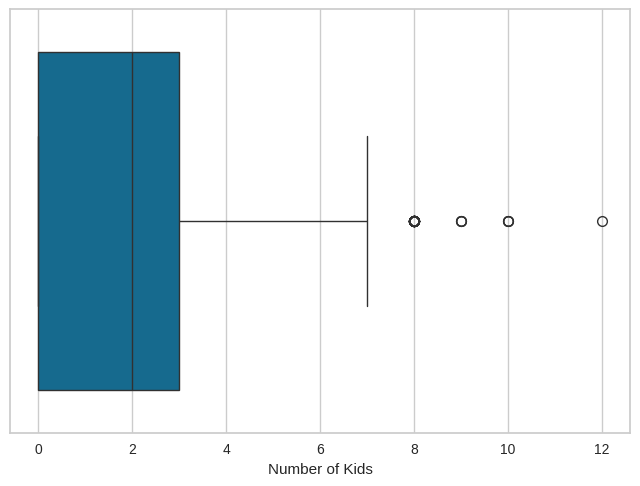

In [ ]:
# Boxploting "Number of Kids" feature
sns.boxplot(x=data["Number of Kids"])

<Axes: xlabel='Number of Kids'>

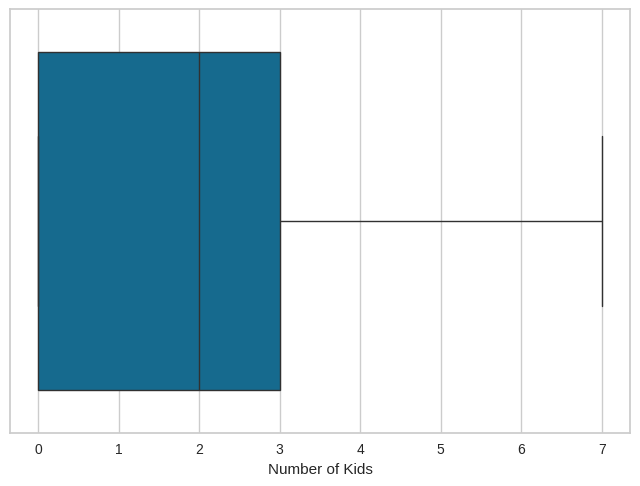

In [ ]:
# Handling the outliers by removing them
data=data[data["Number of Kids"]<=7]
sns.boxplot(x=data["Number of Kids"])

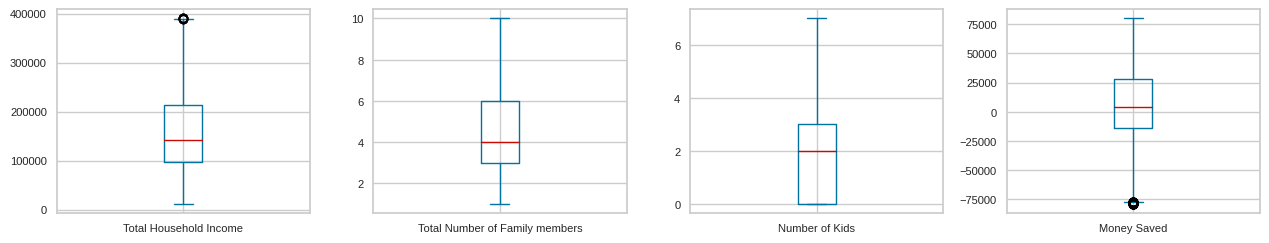

In [ ]:
# exclude categorical data and creat a new datafarme to handel the outliers
data_numric=data.select_dtypes(exclude='object')
#boxploting each feature
fig, axes = plt.subplots(figsize=(16, 12))
data_numric.plot(kind='box', subplots=True, layout=(5, 5), ax=axes, fontsize=8)
fig.tight_layout(pad=1.0)
plt.show()

In [ ]:
data.shape

(34484, 6)

## Label encoding categorical variables

In [ ]:
#Get list of categorical variables
s = (data.dtypes == 'object')
object_cols = list(s[s].index)
#Label Encoding
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
#Label Encoding object dtypes to numeric dtypes
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)

In [ ]:
data.dtypes

Total Household Income              int64
Total Number of Family members      int64
Number of Kids                      int64
House Category                      int64
Marital Status                      int64
Money Saved                       float64
dtype: object

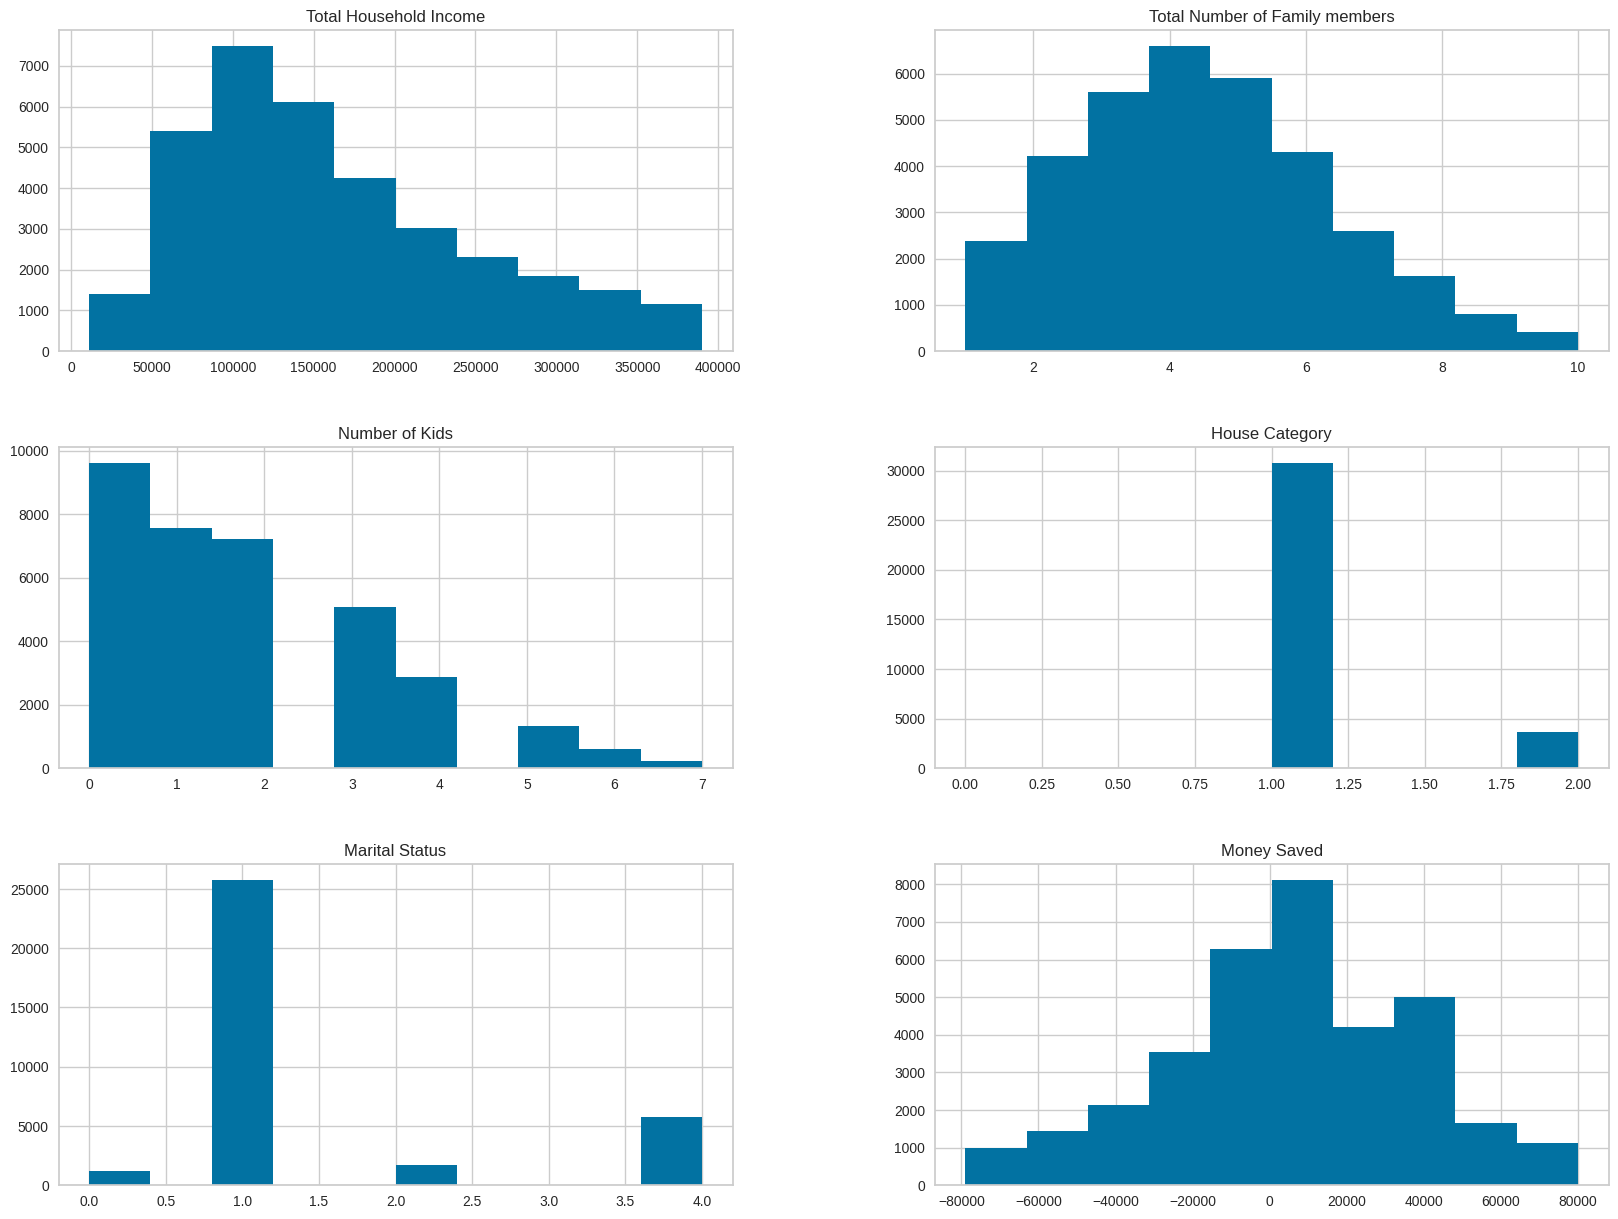

In [ ]:
#Visualizing the features to know the distribution for each one of them
data.hist(figsize=(20,15))
plt.show()

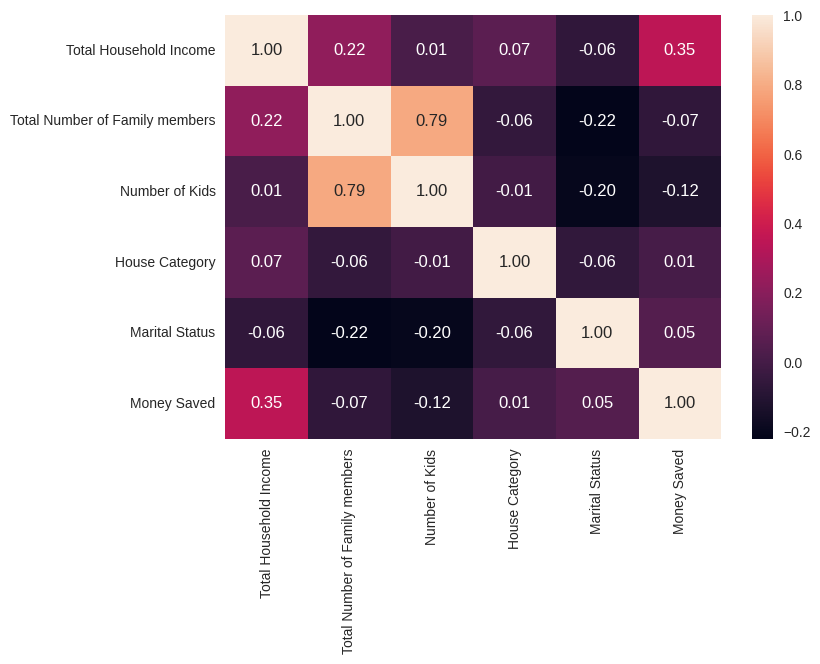

<Figure size 1200x1000 with 0 Axes>

In [ ]:
# Plot the correlation matrix with numeric values
sns.heatmap(data.corr(), annot=True, fmt='.2f' )

# Display the plot
plt.figure(figsize=(12, 10))
plt.show()

# PCA


In [ ]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
#fit the model and apply the dimensionality reduction on dataset
data_pca = pca.fit_transform(data)
# Creating a new dataframe from the PCA dataframe, with columns labeled PC1, PC2, etc.
data_pca = pd.DataFrame(data_pca, columns=['PC'+str(i+1) for i in range(pca.n_components_)])
# view the new dataframe
data_pca.head()

,PC1,PC2,PC3,PC4,PC5
0,36972.292162,-2974.961606,-1.612797,-0.701383,-0.341387
1,-81151.608267,6634.787076,2.910101,-0.196899,-0.605420
2,-58026.572549,19819.072464,-0.340538,-0.557919,-1.684348
3,28238.814936,-4844.794069,-1.355135,-0.672165,1.083987
4,-3587.917733,-38733.615120,-0.758786,-0.722441,1.206298


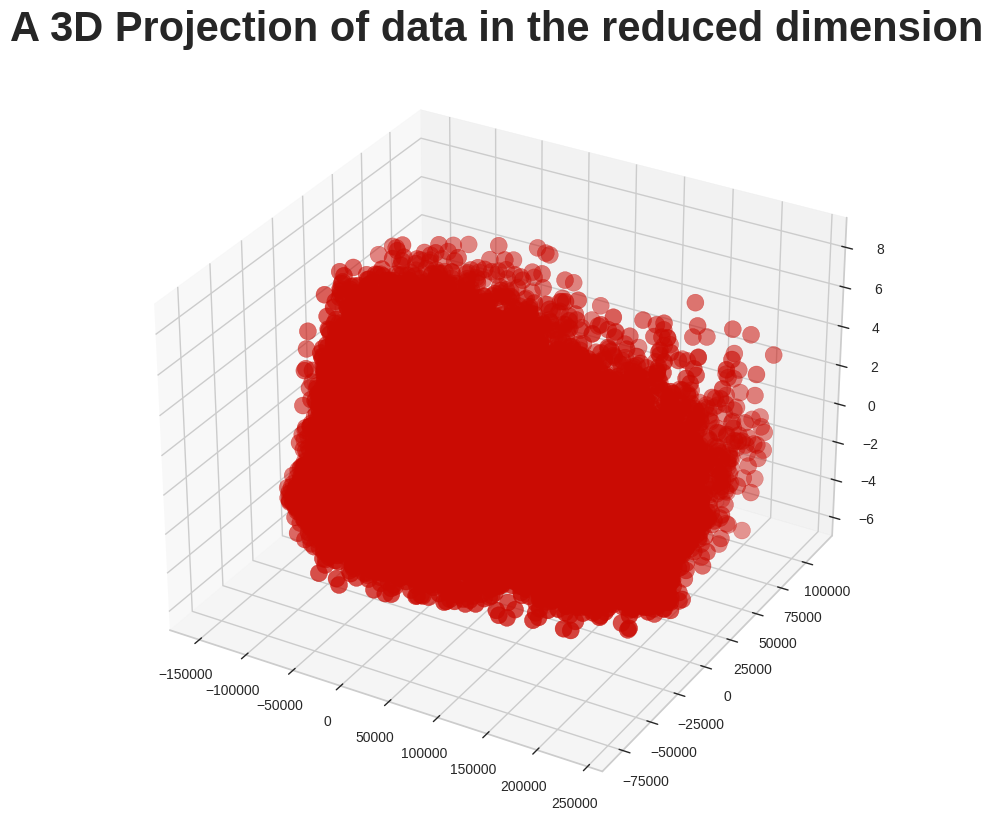

In [ ]:
#A 3D Projection Of Data In The Reduced Dimension
x=data_pca['PC1']
y=data_pca['PC2']
z=data_pca['PC3']


# Scatter Plotting PCA
fig=plt.figure(figsize=(12,10))
xyz=fig.add_subplot(111,projection="3d")
xyz.scatter(x,y,z,s=150, c='r' , marker="o")
xyz.set_title("A 3D Projection of data in the reduced dimension",fontsize=30,weight='bold')
plt.show()

Elbow Method to determine the number of clusters to be formed:


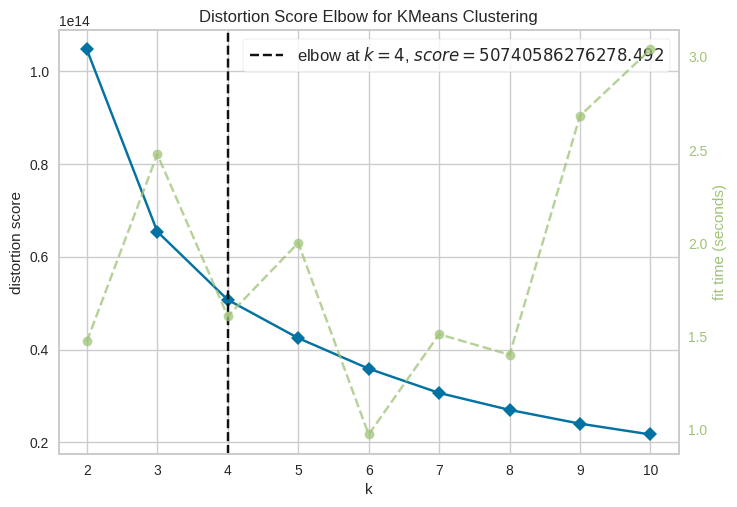

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(data_pca)
Elbow_M.show()

In [ ]:
#definig array includes scores for each K
silhouetteScore=[]
#apply Kmeans for each number of clusters from 2 to 10
for i in range(2,10):
    kmeans = KMeans(i)
    #fit the model
    kmeans.fit(data_pca)
    #predict the clusters
    x_kmeans = kmeans.predict(data_pca)
    #assigning the cluster feature to the data in the PCA
    data_pca["Clusters"]=x_kmeans
    #assigning the clusters feature to the orignal dataframe.
    data["Clusters"]=x_kmeans
    #calculate the silhouette score
    score = silhouette_score(data_pca, kmeans.labels_, metric='euclidean')
    #add each score to the array
    silhouetteScore.append(score)
    #add each score to the array
    print("At k = ", i , " Silhouette Score: ",score)

At k =  2  Silhouette Score:  0.5568757617452935
At k =  3  Silhouette Score:  0.4414336460898556
At k =  4  Silhouette Score:  0.3782545712895601
At k =  5  Silhouette Score:  0.38315093070847833
At k =  6  Silhouette Score:  0.3569468172241564
At k =  7  Silhouette Score:  0.36835317717177296
At k =  8  Silhouette Score:  0.37112621351352887
At k =  9  Silhouette Score:  0.3550511660879733


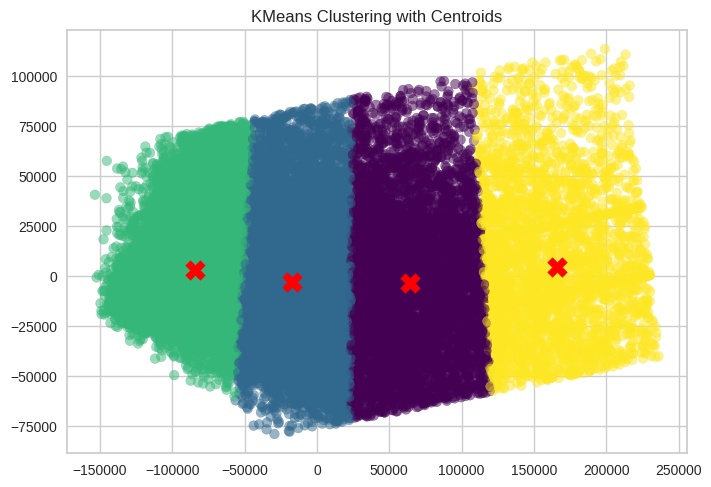

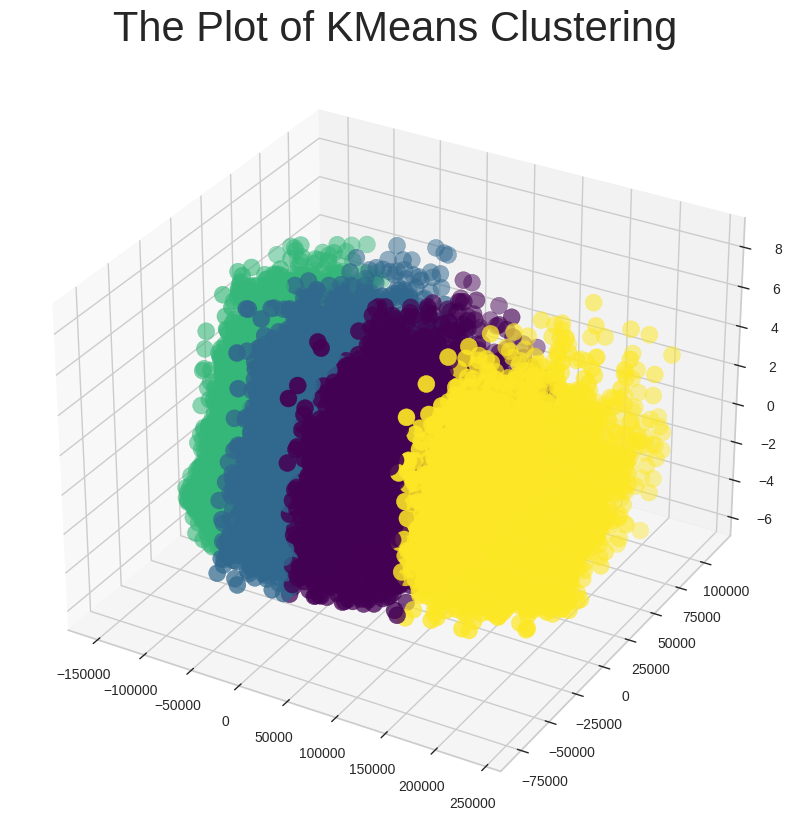

In [ ]:
kmeans = KMeans(n_clusters=4)  # apply kmeans using 4 clusters
# fit model and predict clusters
kmeans_model=kmeans.fit_predict(data_pca)
#Assigning the cluster feature to the Data In The Reduced Dimension
data_pca["Clusters"]=kmeans_model
#Assigning the Clusters feature to the orignal dataframe.
data["Clusters"]=kmeans_model

# Get centroids
centroids = kmeans.cluster_centers_

# Plotting the clusters
plt.scatter(data_pca.iloc[:, 0], data_pca.iloc[:, 1], c=kmeans_model, cmap='viridis', alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200)  # Plot centroids
plt.title('KMeans Clustering with Centroids')
plt.show()
# 3D projection plotting the clusters in Dataset
fig=plt.figure(figsize=(12,10))
plot=plt.subplot(111,projection='3d',label="bla")
plot.set_title("The Plot of KMeans Clustering",fontsize=30)
plot.scatter(x,y,z,s=150,c=kmeans_model,marker='o', cmap='viridis',zorder=10)
plt.show()

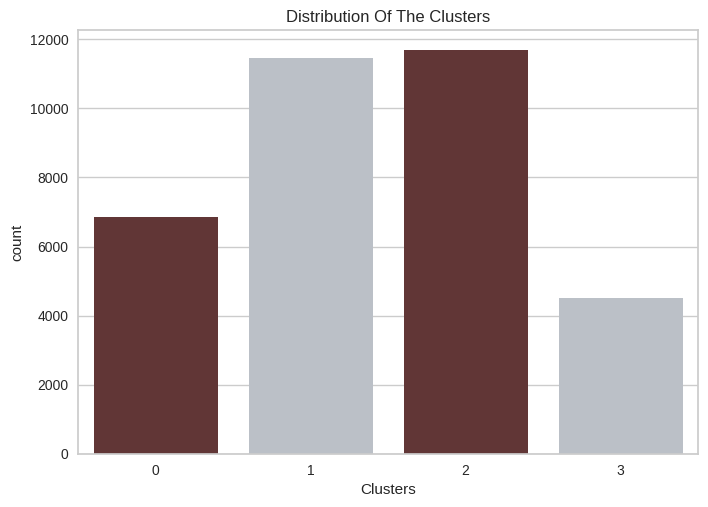

In [ ]:
#Plotting countplot of clusters to show how they are distributed
pal = ["#682F2F","#B9C0C9"]
pl = sns.countplot(x=data["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

## Evaluation

Silhouetter Score:Higher values indicate better cluster separation between [-1,1].

Calinski Harabasz Score:A higher score indicates better defined clusters.

Davies Bouldin Score:Lower values indicate better cluster separation.

In [ ]:
#evaluation metrices
# Separate the features and the cluster labels
X = data_pca.drop('Clusters', axis=1)
clusters = data_pca['Clusters']

# Compute the metrics
sil_score = silhouette_score(X, clusters)
print('Silhouetter Score for Kmeans Clustering Model : %.4f' % sil_score)
calinski_score = calinski_harabasz_score(X, clusters)
print('Calinski Harabasz Score for Kmeans Clustering Model : %.4f' % calinski_score)
davies_score = davies_bouldin_score(X, clusters)
print('Davies Bouldin Score for Kmeans Clustering Model : %.4f' % davies_score)

Silhouetter Score for Kmeans Clustering Model : 0.3793
Calinski Harabasz Score for Kmeans Clustering Model : 54325.1793
Davies Bouldin Score for Kmeans Clustering Model : 0.8823


## Cluster Profiling

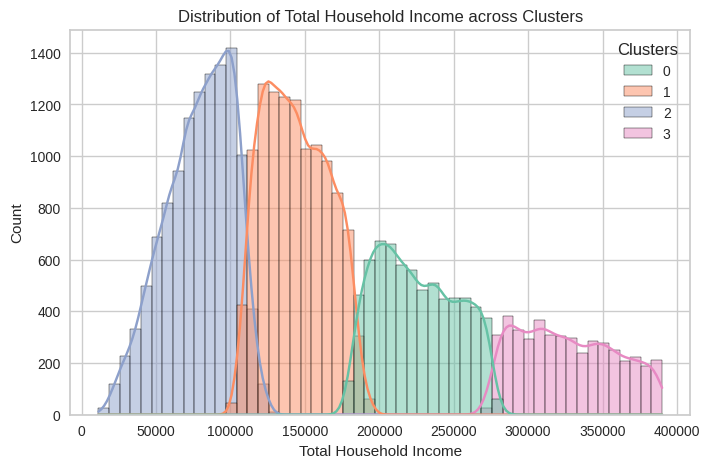

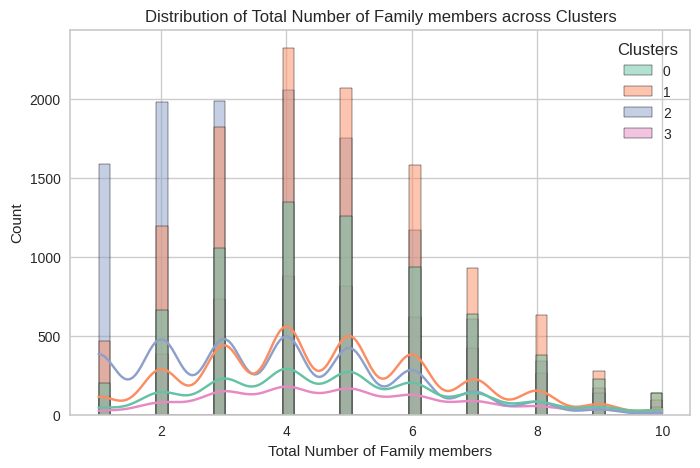

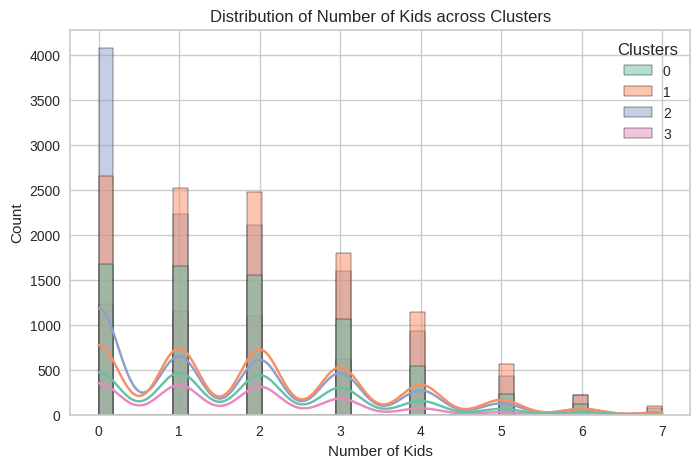

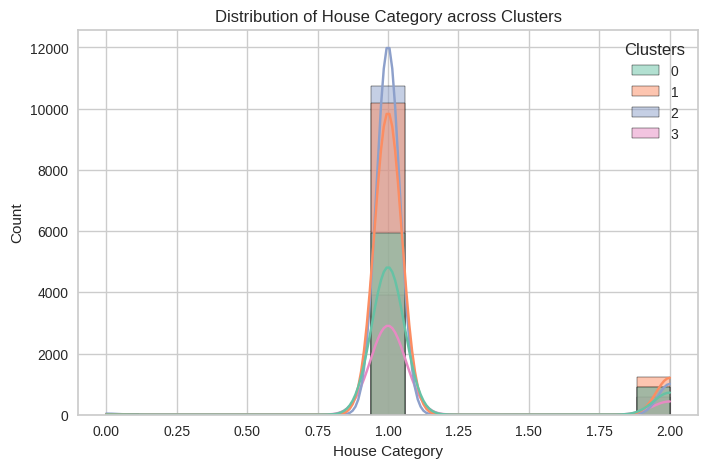

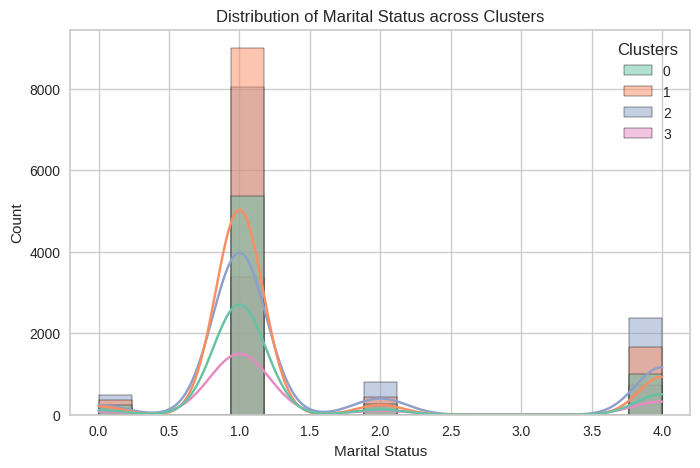

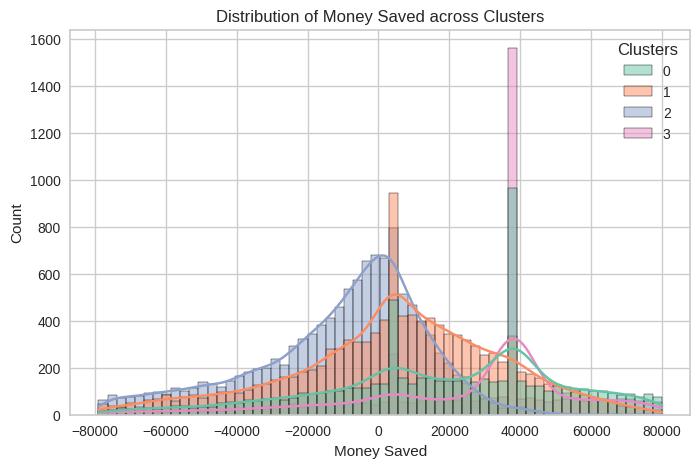

In [ ]:
# Plot feature distribution for each cluster
for feature in data.columns[:-1]:  # Exclude the 'Clusters' column
    plt.figure(figsize=(8, 5))
    sns.histplot(data=data, x=feature, hue='Clusters', kde=True,palette="Set2")
    plt.title(f'Distribution of {feature} across Clusters')
    plt.show()

# Recommendation system

In [ ]:
# Calculate user similarity using cosine similarity
user_similarity = cosine_similarity(data.drop(columns=['Money Saved', 'Clusters']).values)


In [ ]:
# recommendation function
def generate_recommendation(user_index):
    # Find the cluster to which the user belongs
    user_cluster = data.iloc[user_index, -1]  # Use iloc to access the 'Clusters' column

    # Find similar users within the same cluster
    similar_users = np.where(data['Clusters'] == user_cluster)[0]

    # Exclude the current user
    similar_users = similar_users[similar_users != user_index]

    # Find the indices of similar users in the original DataFrame
    similar_users_indices = data.index[similar_users]

    # Calculate average savings of similar users
    avg_savings = data.loc[similar_users_indices, 'Money Saved'].mean()

    # User's savings
    user_savings = data.loc[user_index, 'Money Saved']

    # Recommend savings closer to the average savings of similar users
    recommended_savings = avg_savings

    # If recommended savings are negative, approximate them to similar users with positive savings
    if recommended_savings < 0:
        # Find similar users with positive savings
        similar_users_positive = similar_users_indices[data.loc[similar_users_indices, 'Money Saved'] > 0]
        if len(similar_users_positive) > 0:
            # Calculate average savings of similar users with positive savings
            avg_savings_positive = data.loc[similar_users_positive, 'Money Saved'].mean()
            # Update recommended savings
            recommended_savings = avg_savings_positive

    return recommended_savings


In [ ]:
# Define user indices
user_index_1 = 3  # User index for the first user
user_index_2 = 300  # User index for the second user
user_index_3 = 30000  # User index for the third user

# Call the generate_recommendation function
recommendations_1 = generate_recommendation(user_index_1)
recommendations_2 = generate_recommendation(user_index_2)
recommendations_3 = generate_recommendation(user_index_3)

print(f"Recommended savings for user {user_index_1}: {recommendations_1}")
print(f"Recommended savings for user {user_index_2}: {recommendations_2}")
print(f"Recommended savings for user {user_index_3}: {recommendations_3}")

Recommended savings for user 3: 17776.022477695464
Recommended savings for user 300: 24922.928062308143
Recommended savings for user 30000: 11191.230046152921
